In [1]:
# importing required libraries to analysiis of data
import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns

In [210]:
import matplotlib.pyplot as plt

In [52]:
# reading csv file
df=pd.read_csv(r'data.csv')

In [53]:
df=df.drop('Unnamed: 0',axis=1)

In [54]:
# placing Si.No as index
df.set_index('SI.NO',inplace=True)

In [55]:
# making copy of the data for any coruption ocurrence
df1=df.copy()

## cleaning the data for analysis

In [56]:
# converting property size into sqft
e=df1['Property_size']
e=list(e)
df1['Property_size']=df1['Property_size'].str.replace('sqft','')
df1['Property_size']=df1['Property_size'].str.replace('sqyrd','')
df1['Property_size']=df1['Property_size'].astype(np.int)
for i in range(len(e)):
    if(e[i][-1]=='d'):
        df1['Property_size'][i+1]=df1['Property_size'][i+1]*9
    elif(e[i][-1]=='t'):
        df1['Property_size'][i+1]=df1['Property_size'][i+1]*1

G:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
G:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
df1['Property_size'][256]

18000

In [58]:
#  variable for storing data
e=list(df1['Property_price'])

In [59]:
# converting proprty price in rupees
df1['Property_price']=df1['Property_price'].str.replace('Cr','')
df1['Property_price']=df1['Property_price'].str.replace('Lac','')
df1['Property_price']=df1['Property_price'].replace('Call for Price',np.NaN)
df1['Property_price']=df1['Property_price'].astype(np.float)
for i in range(len(e)):
    if(e[i][-1]=='r'):
        df1['Property_price'][i+1]=df1['Property_price'][i+1]*10000000
    elif(e[i][-1]=='c'):
        df1['Property_price'][i+1]=df1['Property_price'][i+1]*100000

G:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [46]:
e[1:5]

['2.45 Cr', '61.8 Lac', '84.6 Lac', '4.20 Cr']

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 1 to 484
Data columns (total 9 columns):
Property_name     468 non-null object
Property_type     484 non-null object
Property_size     484 non-null int32
Sq_feet_price     484 non-null float64
Property_price    467 non-null float64
Transaction       484 non-null object
Status            484 non-null object
Area              484 non-null object
Location          484 non-null object
dtypes: float64(2), int32(1), object(6)
memory usage: 55.9+ KB


In [65]:
# checking on null data
df1['Property_price'].isna().value_counts()

False    467
True      17
Name: Property_price, dtype: int64

In [101]:
# replacing data which are not given 
df1['Sq_feet_price']=df1['Sq_feet_price'].replace('See other Charges',np.NaN)
df1['Sq_feet_price']=df1['Sq_feet_price'].replace('not given',np.NaN)
df1['Sq_feet_price']=df1['Sq_feet_price'].astype(np.float)

In [126]:
print(df1.groupby(['Location']).Sq_feet_price.mean())

Location
inside city     5496.739130
outside city    4721.717949
Name: Sq_feet_price, dtype: float64


In [102]:
df1['Sq_feet_price']

SI.NO
1      7664.0
2      7061.0
3         NaN
4         NaN
5         NaN
6      4899.0
7      7060.0
8      5725.0
9      4999.0
10     8613.0
11     6300.0
12     4899.0
13     7038.0
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21     2444.0
22        NaN
23        NaN
24        NaN
25     6650.0
26     5314.0
27        NaN
28     1333.0
29        NaN
30        NaN
        ...  
455       NaN
456       NaN
457       NaN
458    3704.0
459       NaN
460       NaN
461       NaN
462       NaN
463       NaN
464       NaN
465       NaN
466       NaN
467       NaN
468    3500.0
469       NaN
470       NaN
471       NaN
472       NaN
473       NaN
474       NaN
475    3440.0
476       NaN
477       NaN
478       NaN
479    3985.0
480       NaN
481       NaN
482       NaN
483       NaN
484       NaN
Name: Sq_feet_price, Length: 484, dtype: float64

In [133]:
df1.Sq_feet_price.isna().value_counts()

True     360
False    124
Name: Sq_feet_price, dtype: int64

In [116]:
df1[df1['Sq_feet_price'].isna()].shape

(360, 9)

In [139]:
df1.Sq_feet_price.fillna(df1.groupby('Location')['Sq_feet_price'].transform('mean'),inplace=True)

In [142]:
df1['Sq_feet_price'].isna().value_counts()

False    484
Name: Sq_feet_price, dtype: int64

In [159]:
#property wise and transcation wise property price mean
print(df1.groupby(['Property_type','Transaction','Property_name'])['Property_price'].mean())

Property_type  Transaction   Property_name
Apartment      New Property  1 BHK            2.125000e+06
                             2 BHK            5.225089e+06
                             3 BHK            9.917311e+06
                             4 BHK            2.490000e+07
               Resale        2 BHK            6.290000e+06
                             3 BHK            9.317647e+06
                             4 BHK            1.300000e+07
Builder Floor  New Property  1 BHK            1.900000e+06
                             2 BHK            4.407700e+06
                             3 BHK            6.480000e+06
               Resale        2 BHK            4.800000e+06
                             3 BHK            5.800000e+06
House          New Property  0 BHK            2.500000e+07
                             3 BHK            1.104000e+07
                             9 BHK            3.800000e+07
               Resale        3 BHK            1.800000e+07
             

In [148]:
# checking for nan values
df1[df1['Property_price'].isna()]

,Property_name,Property_type,Property_size,Sq_feet_price,Property_price,Transaction,Status,Area,Location
SI.NO,,,,,,,,,
53,NaN,Plot/Land,1800,4721.717949,NaN,New Property,Possession by Dec '19,Tellapur,outside city
192,3 BHK,Apartment,1450,4721.717949,NaN,Resale,Ready to Move,Bachupally,outside city
197,2 BHK,Apartment,1075,4721.717949,NaN,Resale,Possession by Dec '19,Bachupally,outside city
278,5 BHK,Villa,4090,5496.739130,NaN,New Property,Possession by Mar '20,Kukatpally,inside city
280,4 BHK,Villa,4090,5496.739130,NaN,New Property,Ready to Move,Kukatpally,inside city
291,4 BHK,Villa,4090,5496.739130,NaN,New Property,Possession by May '21,Kukatpally,inside city
298,4 BHK,Villa,4090,5496.739130,NaN,New Property,Ready to Move,Kukatpally,inside city
312,4 BHK,Villa,4090,5496.739130,NaN,New Property,Possession by May '21,Kukatpally,inside city
322,4 BHK,Villa,4090,5496.739130,NaN,New Property,Possession by May '21,Kukatpally,inside city


## visualistions

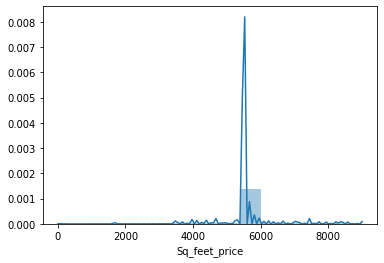

In [161]:
# distibution for squarefeet price in inside city 
sns.distplot(df1[df1['Location']=='inside city'].Sq_feet_price)

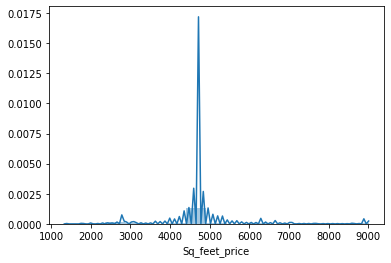

In [162]:
# distibution for squarefeet price in inside city 
sns.distplot(df1[df1['Location']=='outside city'].Sq_feet_price)

In [205]:
# correlation matrix
df1.corr()

,Property_size,Sq_feet_price,Property_price
Property_size,1.000000,0.171529,0.764513
Sq_feet_price,0.171529,1.000000,0.231111
Property_price,0.764513,0.231111,1.000000


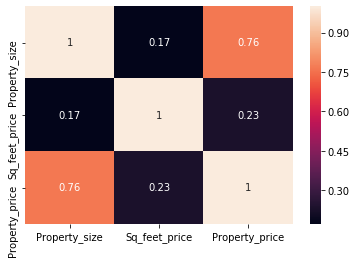

In [207]:
#checking relation between the variables
sns.heatmap(df1.corr(),annot=True)

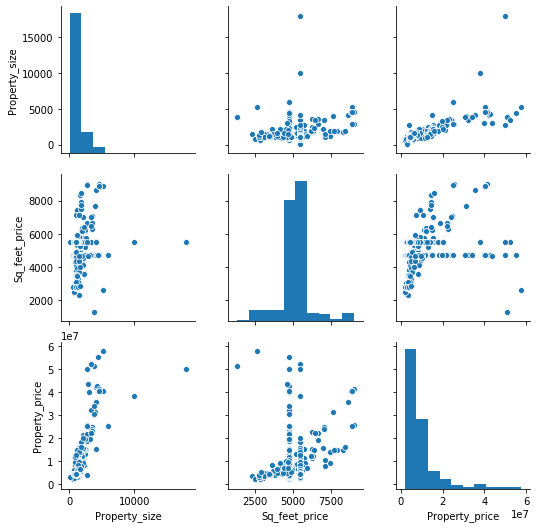

In [186]:
# ploting pair plot
sns.pairplot(df1)

In [166]:
#square feet price is not given checking
df1[df1['Sq_feet_price']==0]

,Property_name,Property_type,Property_size,Sq_feet_price,Property_price,Transaction,Status,Area,Location
SI.NO,,,,,,,,,
286,NaN,Plot/Land,3600,0.0,28000000.0,Resale,Ready to Move,Kukatpally,inside city
314,NaN,Plot/Land,1350,0.0,6000000.0,New Property,Ready to Move,Kukatpally,inside city


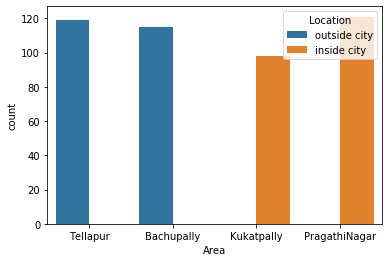

In [184]:
#counting weather inside or outside properties are mprein the data
sns.countplot(df1.Area,hue=df1.Location)

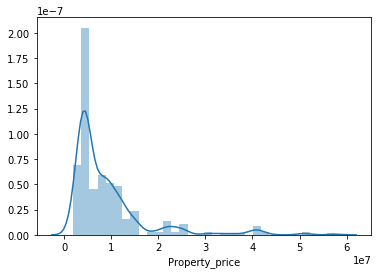

In [203]:
# new sale property distribution
sns.distplot(df1['Property_price'][df1['Transaction']=='New Property'])

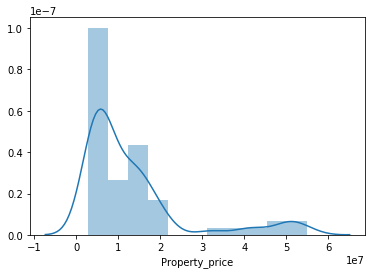

In [204]:
# reslae propererty distribution
sns.distplot(df1['Property_price'][df1['Transaction']=='Resale'])

In [201]:
df1['Transaction'].unique()

array(['New Property', 'Resale'], dtype=object)

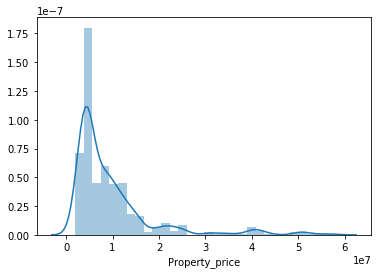

In [183]:
# distribution on propert price
sns.distplot(df1.Property_price)

In [181]:
# droping all nan values
df1.dropna(inplace=True)

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 1 to 484
Data columns (total 9 columns):
Property_name     453 non-null object
Property_type     453 non-null object
Property_size     453 non-null int32
Sq_feet_price     453 non-null float64
Property_price    453 non-null float64
Transaction       453 non-null object
Status            453 non-null object
Area              453 non-null object
Location          453 non-null object
dtypes: float64(2), int32(1), object(6)
memory usage: 33.6+ KB


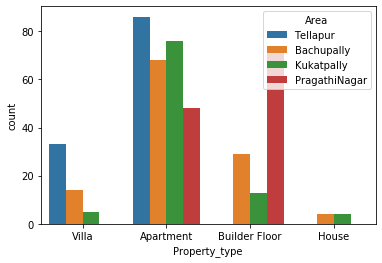

In [185]:
# visualization of area wise type of properties 
sns.countplot(df1.Property_type,hue=df1.Area)

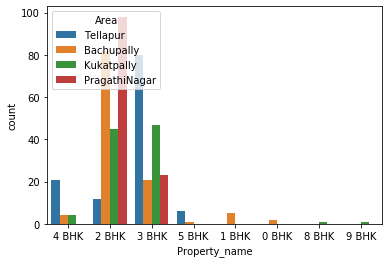

In [190]:
# visualization on no.of BHK availabe on area wise(BHK-bedroom,hall,kitchen)
sns.countplot(df1.Property_name,hue=df1.Area)

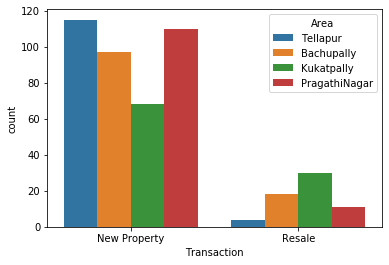

In [191]:
#visualization on transaction type of property on area wise
sns.countplot(df1.Transaction,hue=df1.Area)

In [208]:
df1.Property_name.unique()

array(['4 BHK', '2 BHK', '3 BHK', '5 BHK', '1 BHK', '0 BHK', '8 BHK',
       '9 BHK'], dtype=object)

In [273]:
df1.Area.value_counts()

PragathiNagar    121
Tellapur         119
Bachupally       115
Kukatpally        98
Name: Area, dtype: int64

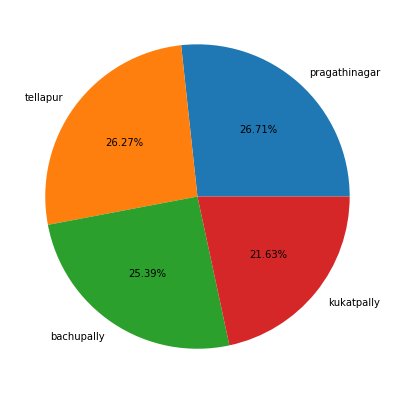

In [276]:
#visualization on extracted data percentage of property sales in area wise
plt.figure(figsize=(10,7))
plt.pie(df1.Area.value_counts(),labels=['pragathinagar','tellapur','bachupally','kukatpally'],autopct='%1.2f%%');

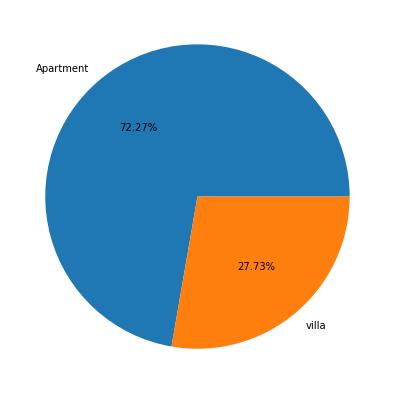

In [275]:
# percentage on type of property availabilityin tellapur
plt.figure(figsize=(10,7))
plt.pie(df1[df1['Area']=='Tellapur']['Property_type'].value_counts(),labels=['Apartment','villa'],autopct='%1.2f%%');

In [272]:
df1[df1['Area']=='Tellapur']['Property_type'].value_counts()

Apartment    86
Villa        33
Name: Property_type, dtype: int64

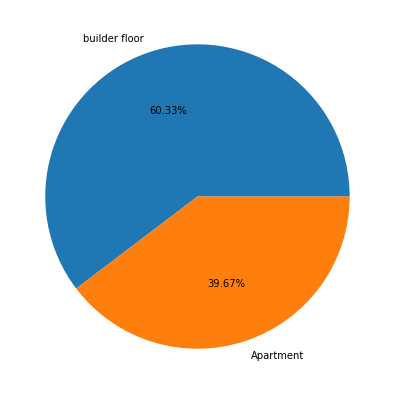

In [280]:
# percentage on type of property availabilityin pragathi nagar
plt.figure(figsize=(10,7))
plt.pie(df1[df1['Area']=='PragathiNagar']['Property_type'].value_counts(),labels=['builder floor','Apartment'],autopct='%1.2f%%');

In [278]:
df1[df1['Area']=='PragathiNagar']['Property_type'].value_counts()

Builder Floor    73
Apartment        48
Name: Property_type, dtype: int64

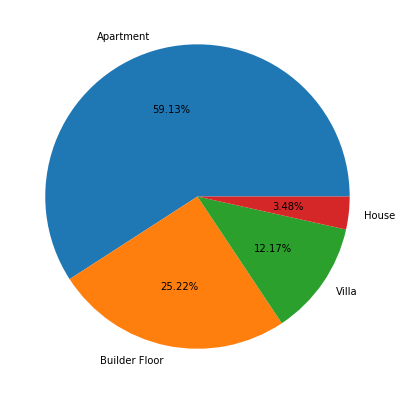

In [284]:
# percentage on type of property availabilityin bachupally
plt.figure(figsize=(10,7))
plt.pie(df1[df1['Area']=='Bachupally']['Property_type'].value_counts(),labels=['Apartment','Builder Floor','Villa','House'],autopct='%1.2f%%');

In [281]:
df1[df1['Area']=='Bachupally']['Property_type'].value_counts()

Apartment        68
Builder Floor    29
Villa            14
House             4
Name: Property_type, dtype: int64

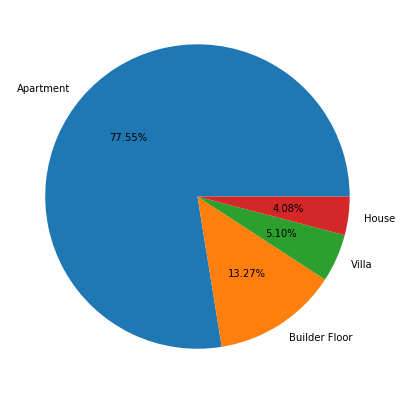

In [287]:
# percentage on type of property availabilityin kukatpally
plt.figure(figsize=(10,7))
plt.pie(df1[df1['Area']=='Kukatpally']['Property_type'].value_counts(),labels=['Apartment','Builder Floor','Villa','House'],autopct='%1.2f%%');

In [285]:
df1[df1['Area']=='Kukatpally']['Property_type'].value_counts()

Apartment        76
Builder Floor    13
Villa             5
House             4
Name: Property_type, dtype: int64

# univarient analysis

### analysis on the square feet price

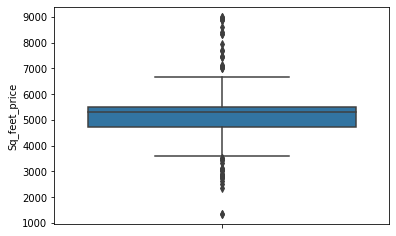

In [240]:
#analysison the square feet price
sns.boxplot(y=df1.Sq_feet_price);

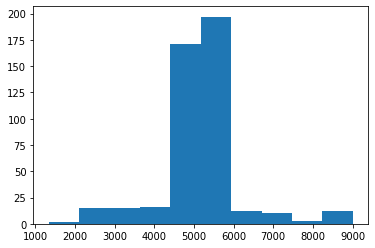

In [236]:
plt.hist(df1.Sq_feet_price);

### analysis on the property price

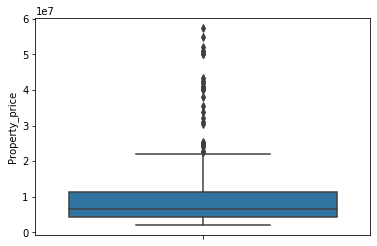

In [237]:
sns.boxplot(y=df1.Property_price);

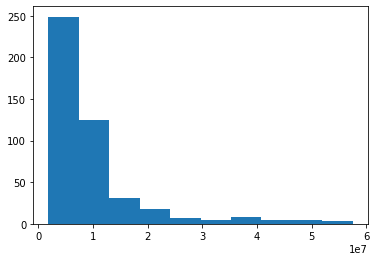

In [239]:
plt.hist(df1.Property_price);

### analysis on the propert size

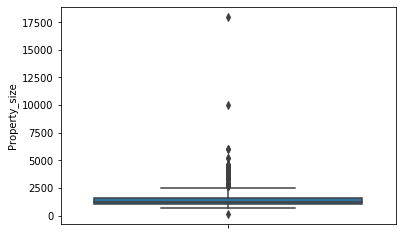

In [242]:
sns.boxplot(y=df1.Property_size)

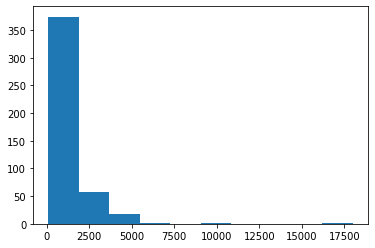

In [245]:
plt.hist(df1.Property_size);

# bivarient analysis

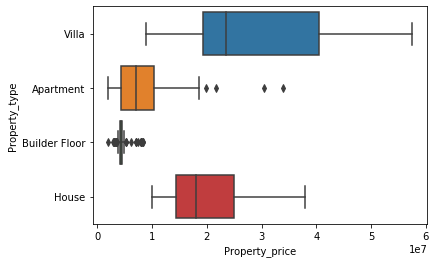

In [255]:
# analysis on the property price and property type
sns.boxplot(x=df1.Property_price,y=df1.Property_type);

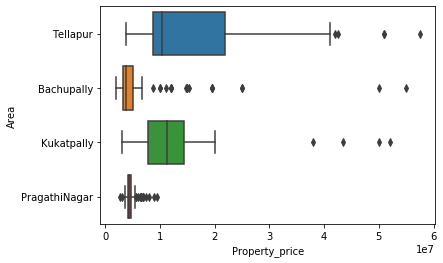

In [256]:
# analysis on the property price and area
sns.boxplot(x=df1.Property_price,y=df1.Area);

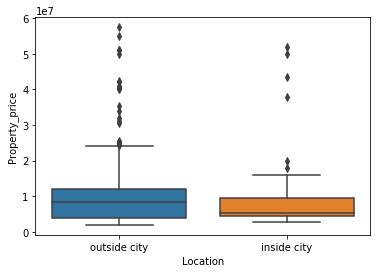

In [264]:
#analysis on the property price and location
sns.boxplot(y=df1.Property_price,x=df1.Location)

# conclusion

In general if we see the price on the market of properties on inside of city will be more But on the data extracted the outside of the city price is more due to the unbalencing in the data which have been extracted, by seeing the visualization of the pie chart on area wise property sales availability the outside of the Hyderabad is more than compared to the inside of the city 